## Wprowadzenie
Skrypt pokazuje jak użyć pakietu SciKit do klasyfikacji danych. Rozważane są dwa przykłady:  zestaw danych IRIS oraz zestaw danych TITANIC  (do ściągnięcia z https://www.kaggle.com/c/titanic, dokładniej: potrzebny jest  plik https://www.kaggle.com/c/titanic/download/train.csv).

In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree

In [2]:
from graphviz import Source

## 1. Pierwszy zestaw danych
Dane IRIS

In [3]:
# wczytanie zestawu danych
from sklearn import datasets
iris = datasets.load_iris()

data_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
data_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# rozbicie zestawu danych na dane opisujące kwiat (X) i etykietę klasy (y)
y_iris = data_iris['species']
X_iris = data_iris.drop('species', axis=1)

# stworzenie drzewa klasyfikacyjnego
t_iris = tree.DecisionTreeClassifier()
t_iris.fit(X_iris, y_iris)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

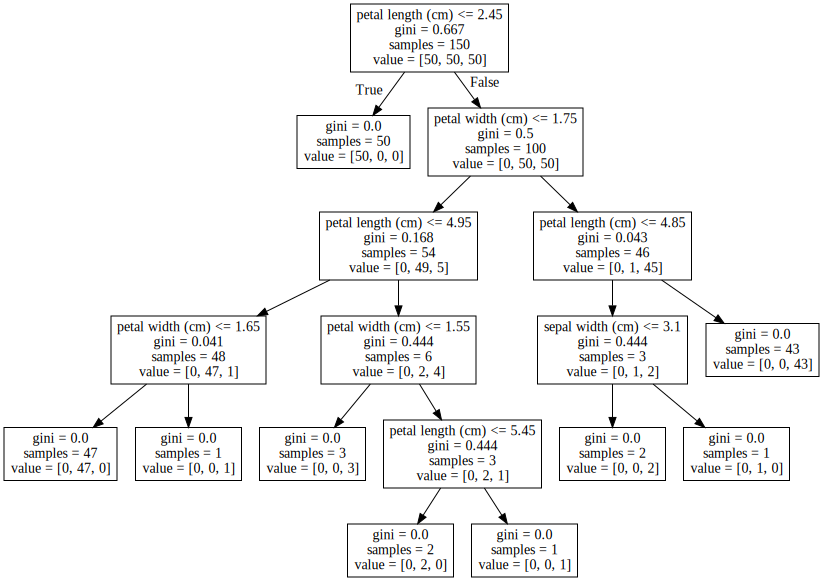

In [5]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:
#   dot -Tpdf iris.dot -o iris.pdf

Source(tree.export_graphviz(t_iris, out_file=None, feature_names=X_iris.columns))

In [6]:
# ocena stworzonego klasyfikatora na danych uczących
t_iris.score(X_iris, y_iris)

1.0

In [7]:
# Uczciwiej byłoby oceniać klasyfikator na danych, które nie były używane podczas tworzenia
# klasyfikatora. Dlatego cały zestaw danych warto podzielić na dwie części: dane uczące i dane
# testowe.

data_iris['train'] = np.random.uniform(0, 1, len(data_iris))

data_train = data_iris[data_iris['train'] <= 0.65]
data_test = data_iris[data_iris['train'] > 0.65]

y = data_train['species']
X = data_train.drop('species', axis = 1)

t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

print(t.score(X, y))

y = data_test['species']
X = data_test.drop('species', axis = 1)

print(t.score(X, y))

1.0
0.9534883720930233


## 2. Drugi zestaw danych
Dane TITANIC (do ściągnięcia z https://www.kaggle.com/c/titanic, dokładniej: potrzebny jest  plik https://www.kaggle.com/c/titanic/download/train.csv).

In [8]:
# wczytanie zestawu danych z pliku
data = pd.read_csv("assets/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# usunięcie z zestawu danych atrybutów nieistotnych dla klasyfikacji
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data = data.dropna()
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# zmiana kodowania atrybutów nominalnych w zestawie danych
data['Sex'] = pd.Categorical(data['Sex']).codes
data['Embarked'] = pd.Categorical(data['Embarked']).codes
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [11]:
# rozbicie zestawu danych na dane opisujące pasażera (X) i etykietę klasy (y)
y = data['Survived']
X = data.drop('Survived', axis = 1)

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

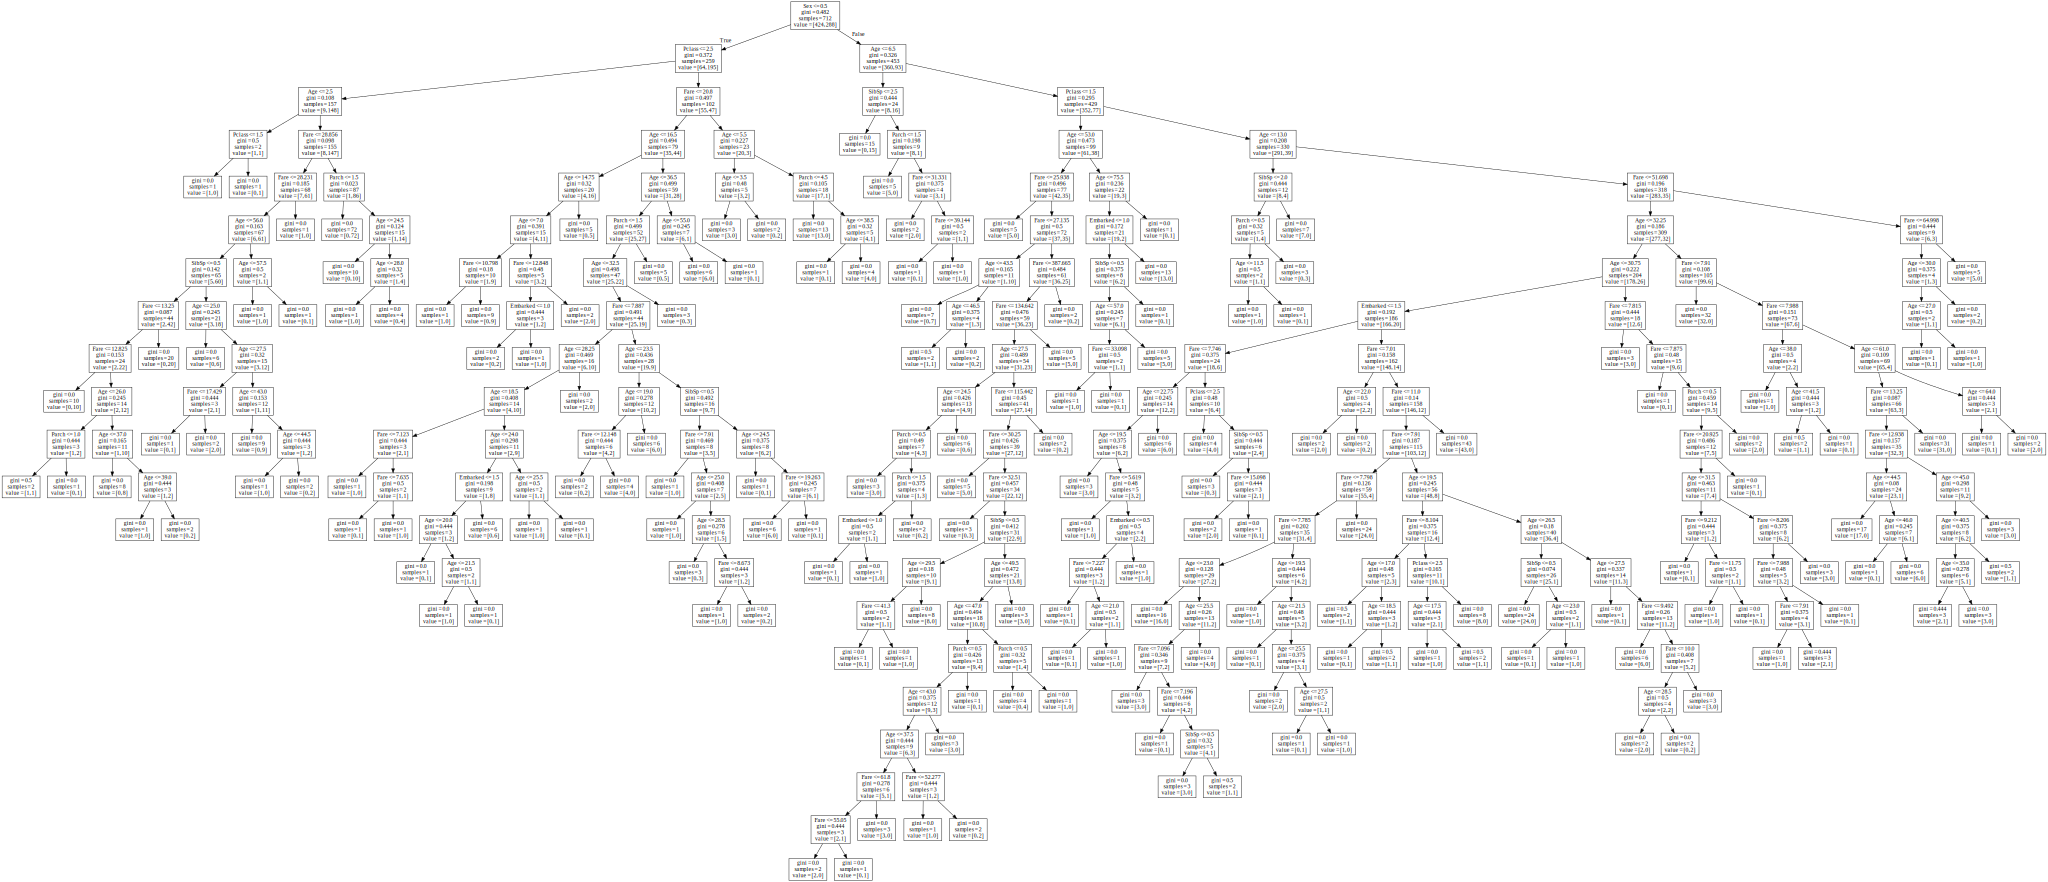

In [12]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:
#   dot -Tpdf titanic.dot -o titanic.pdf

Source(tree.export_graphviz(t, out_file=None, feature_names=X.columns))

In [13]:
# ocena stworzonego klasyfikatora na danych uczących
t.score(X, y)

0.9859550561797753

In [14]:
# Uczciwiej byłoby oceniać klasyfikator na danych, które nie były używane podczas tworzenia
# klasyfikatora. Dlatego cały zestaw danych warto podzielić na dwie części: dane uczące i dane
# testowe (lista 5 zadanie 2b).

# 2

## a)

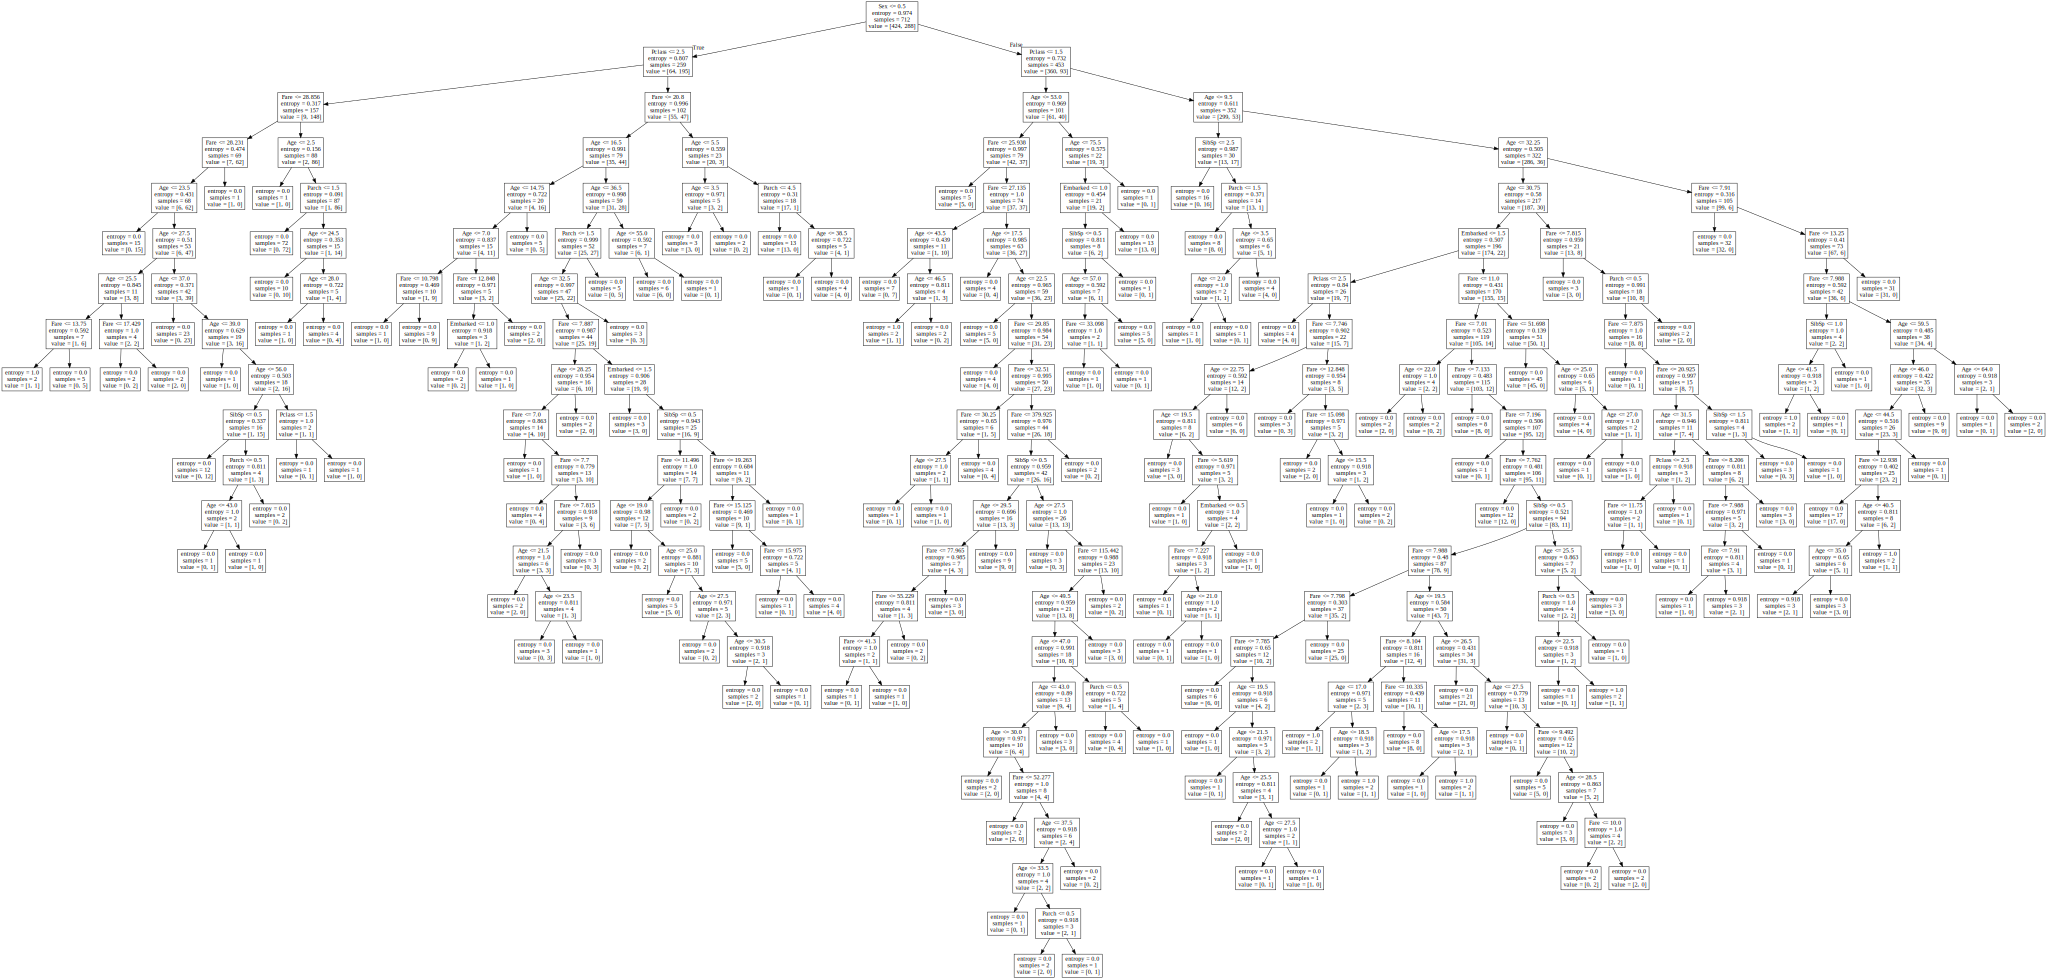

In [15]:
# entropy-based tree
t_ent = tree.DecisionTreeClassifier(criterion='entropy')
t_ent.fit(X, y)
Source(tree.export_graphviz(t_ent, out_file=None, feature_names=X.columns))

In [16]:
t_ent.score(X, y)

0.9859550561797753

## b)

In [17]:
perm = np.random.permutation(len(X))
train_data, test_data = np.split(X.iloc[perm], [600])
train_target, test_target = np.split(y.iloc[perm], [600])

In [18]:
t.fit(train_data, train_target)
t.score(test_data, test_target)

0.8303571428571429

In [19]:
t_ent.fit(train_data, train_target)
t_ent.score(test_data, test_target)

0.8482142857142857

## c)

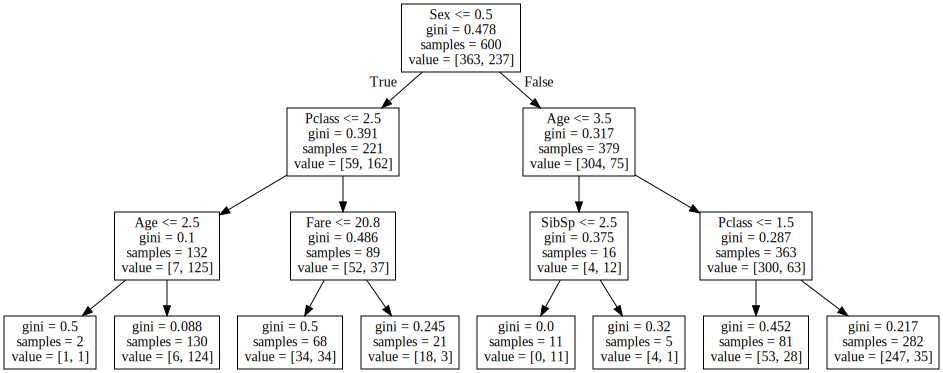

In [20]:
t_shallow = tree.DecisionTreeClassifier(max_depth=3)
t_shallow.fit(train_data, train_target)
Source(tree.export_graphviz(t_shallow, out_file=None, feature_names=X.columns))

In [21]:
t_shallow.score(train_data, train_target)

0.82

In [22]:
t_shallow.score(test_data, test_target)

0.7410714285714286

## d)

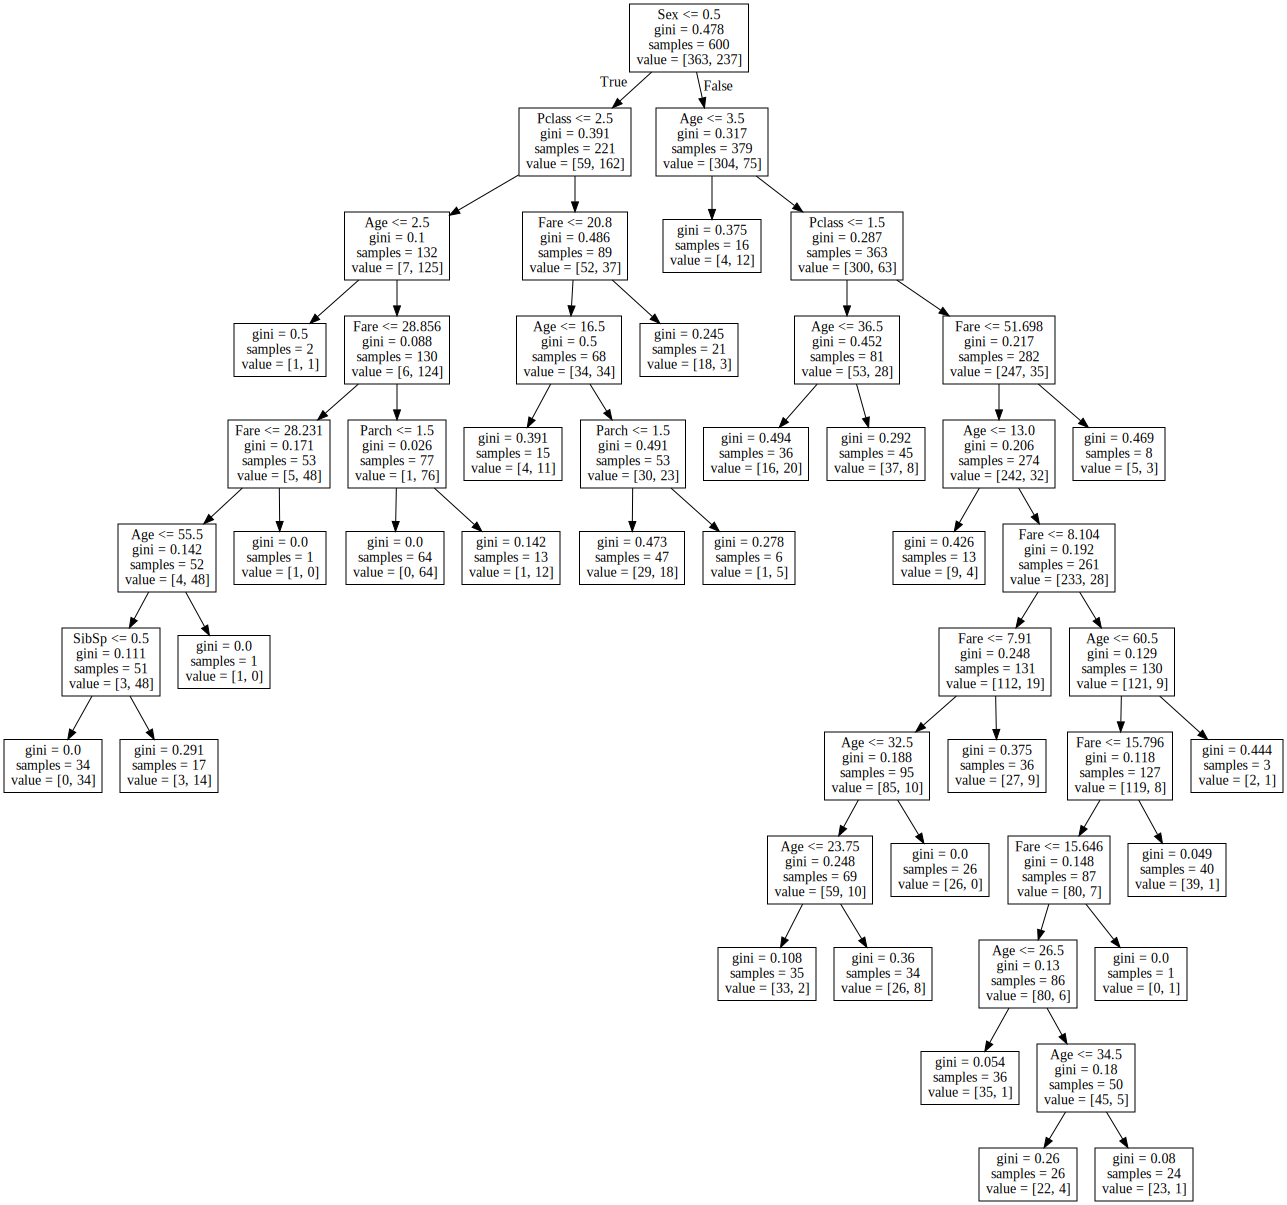

In [23]:
t_pruned = tree.DecisionTreeClassifier(min_samples_split=50)
t_pruned.fit(train_data, train_target)
Source(tree.export_graphviz(t_pruned, out_file=None, feature_names=X.columns))

In [24]:
t_pruned.score(train_data, train_target)

0.845

In [25]:
t_pruned.score(test_data, test_target)

0.7678571428571429

## e)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
def cross_validate_tree(tree, data, target, confusion=False):
    perm = np.random.permutation(len(target))
    data_ = data.iloc[perm]
    target_ = target.iloc[perm]
    
    data_batches = np.array_split(data_, 10)
    target_batches = np.array_split(target_, 10)
    
    cm = np.zeros((len(set(target)), len(set(target))), dtype=np.int32)
    scores = []
    for i in range(10):
        train_data = np.vstack([*data_batches[:i], *data_batches[i + 1:]])
        train_target = np.hstack([*target_batches[:i], *target_batches[i + 1:]])
        test_data = data_batches[i]
        test_target = target_batches[i]
        
        tree.fit(train_data, train_target)
        scores.append(tree.score(test_data, test_target))
        
        
        labels = tree.predict(test_data)
        cm += confusion_matrix(test_target, labels)
    print(cm)
        
    return np.mean(scores)

In [28]:
for t_ in t, t_ent, t_shallow, t_pruned:
    print(cross_validate_tree(t_, X, y))

[[337  87]
 [ 92 196]]
0.7484546165884194
[[344  80]
 [ 79 209]]
0.7766627543035993
[[370  54]
 [ 84 204]]
0.8061424100156496
[[370  54]
 [ 93 195]]
0.7936032863849766


# 3

In [29]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [30]:
rf = RandomForestClassifier()
cross_validate_tree(rf, X, y, confusion=True)

[[366  58]
 [ 89 199]]


0.7934859154929578

In [31]:
etc = ExtraTreesClassifier()
cross_validate_tree(etc, X, y, confusion=True)

[[358  66]
 [ 87 201]]


0.7852503912363068

In [32]:
cross_validate_tree(rf, X_iris, y_iris, confusion=True)

[[50  0  0]
 [ 0 46  4]
 [ 0  7 43]]


0.9266666666666667

In [33]:
cross_validate_tree(etc, X_iris, y_iris, confusion=True)

[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


0.9600000000000002

# 4

In [34]:
def normalize(X):
    max_by_col = np.max(X, axis=0)
    min_by_col = np.min(X, axis=0)
    return (X - min_by_col) / (max_by_col - min_by_col)

In [35]:
def prepare_data(data, *, target_col, to_normalize=False):
    data.dropna()  # better way to handle?
    data.columns = range(len(data.columns))
    for col in data.columns:
        data[col] = pd.Categorical(data[col]).codes
    X = data.drop(target_col, axis=1)
    if to_normalize:
        X = normalize(X)
    y = data[target_col]
    return X, y

In [36]:
def test_all_trees(X, y, graph=True, max_depth=None):
    t = tree.DecisionTreeClassifier(max_depth=max_depth)
    s = cross_validate_tree(t, X, y, confusion=True)
    print('gini tree', s)
    rf = RandomForestClassifier(max_depth=max_depth)
    s = cross_validate_tree(rf, X, y, confusion=True)
    print('random forest', s)
    etc = ExtraTreesClassifier(max_depth=max_depth)
    s = cross_validate_tree(etc, X, y, confusion=True)
    print('extremely random', s)
    if graph:
        return Source(tree.export_graphviz(t, out_file=None, feature_names=X.columns))

In [37]:
data = pd.read_csv('assets/agaricus-lepiota.data')
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [38]:
X, y = prepare_data(data, target_col=0)
X.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1


[[4208    0]
 [   0 3915]]
gini tree 1.0
[[4208    0]
 [   0 3915]]
random forest 1.0
[[4208    0]
 [   0 3915]]
extremely random 1.0


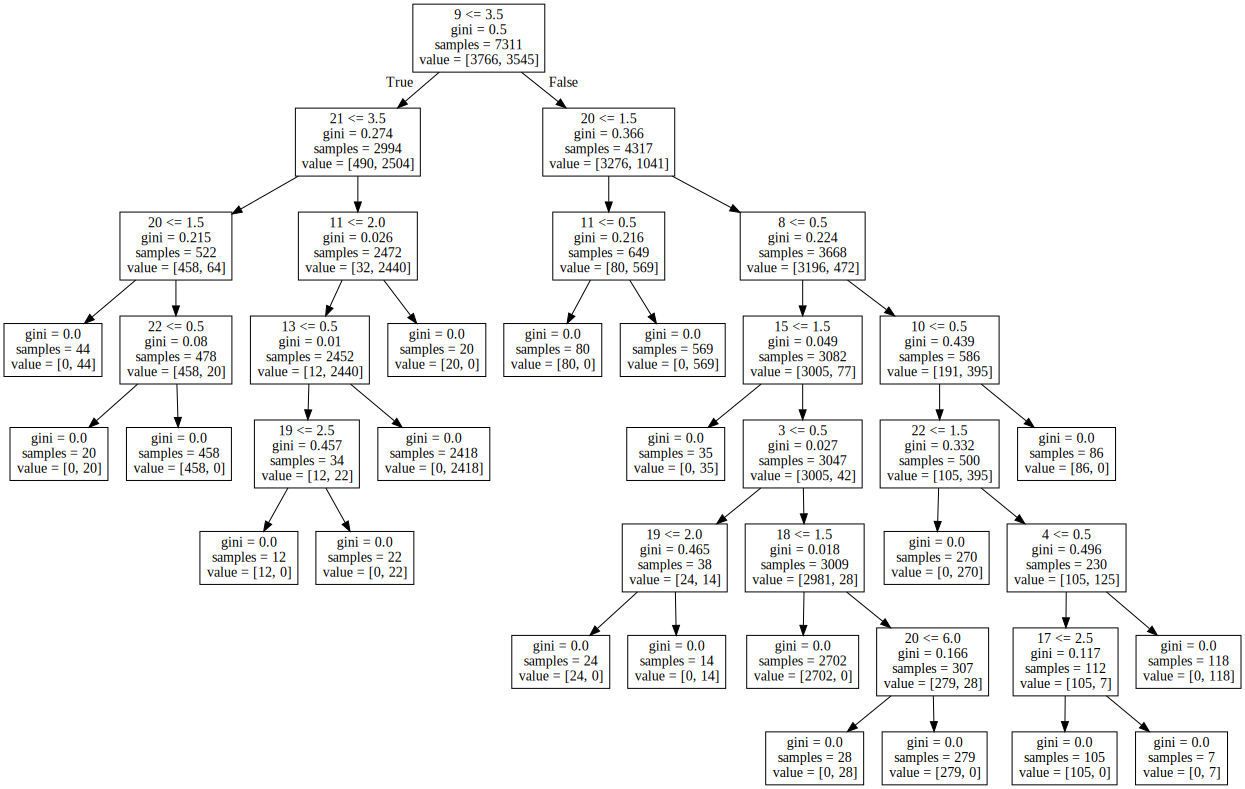

In [39]:
test_all_trees(X, y)

# 5

In [40]:
data = pd.read_csv('assets/car.data')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [41]:
X, y = prepare_data(data, target_col=6)
X.head()

,0,1,2,3,4,5
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


[[ 368    6    8    2]
 [   3   66    0    0]
 [  11    0 1198    0]
 [   2    0    0   63]]
gini tree 0.9814592015055787
[[ 367    7    7    3]
 [  17   52    0    0]
 [  22    1 1186    0]
 [   7    0    0   58]]
random forest 0.9629452883452079
[[ 360    5   16    3]
 [  21   48    0    0]
 [  35    0 1174    0]
 [   6    0    0   59]]
extremely random 0.9501982793386208


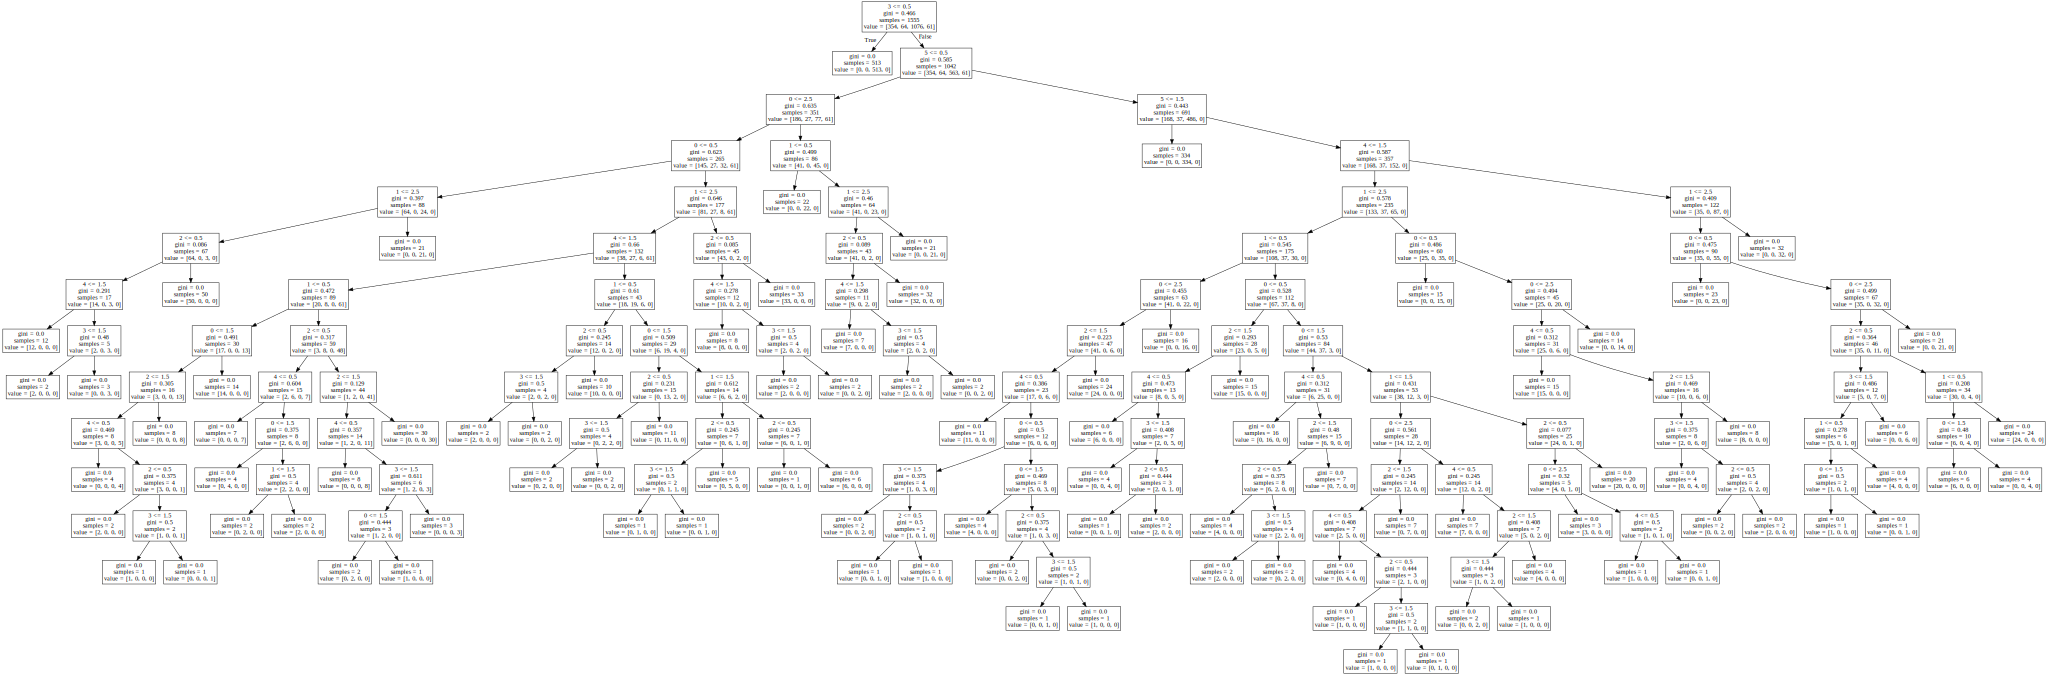

In [42]:
test_all_trees(X, y)

In [43]:
X_n = normalize(X)
X_n.head()

,0,1,2,3,4,5
0,1.0,1.0,0.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.5,0.5
3,1.0,1.0,0.0,0.0,0.5,1.0
4,1.0,1.0,0.0,0.0,0.5,0.0


[[ 373    4    6    1]
 [   6   62    1    0]
 [  10    1 1198    0]
 [   1    2    0   62]]
gini tree 0.9814827261728725
[[ 361    6   13    4]
 [  13   54    0    2]
 [  25    1 1183    0]
 [   3    1    0   61]]
random forest 0.9606163462831026
[[ 354    5   20    5]
 [  20   47    0    2]
 [  53    1 1155    0]
 [   4    1    0   60]]
extremely random 0.9357138056190347


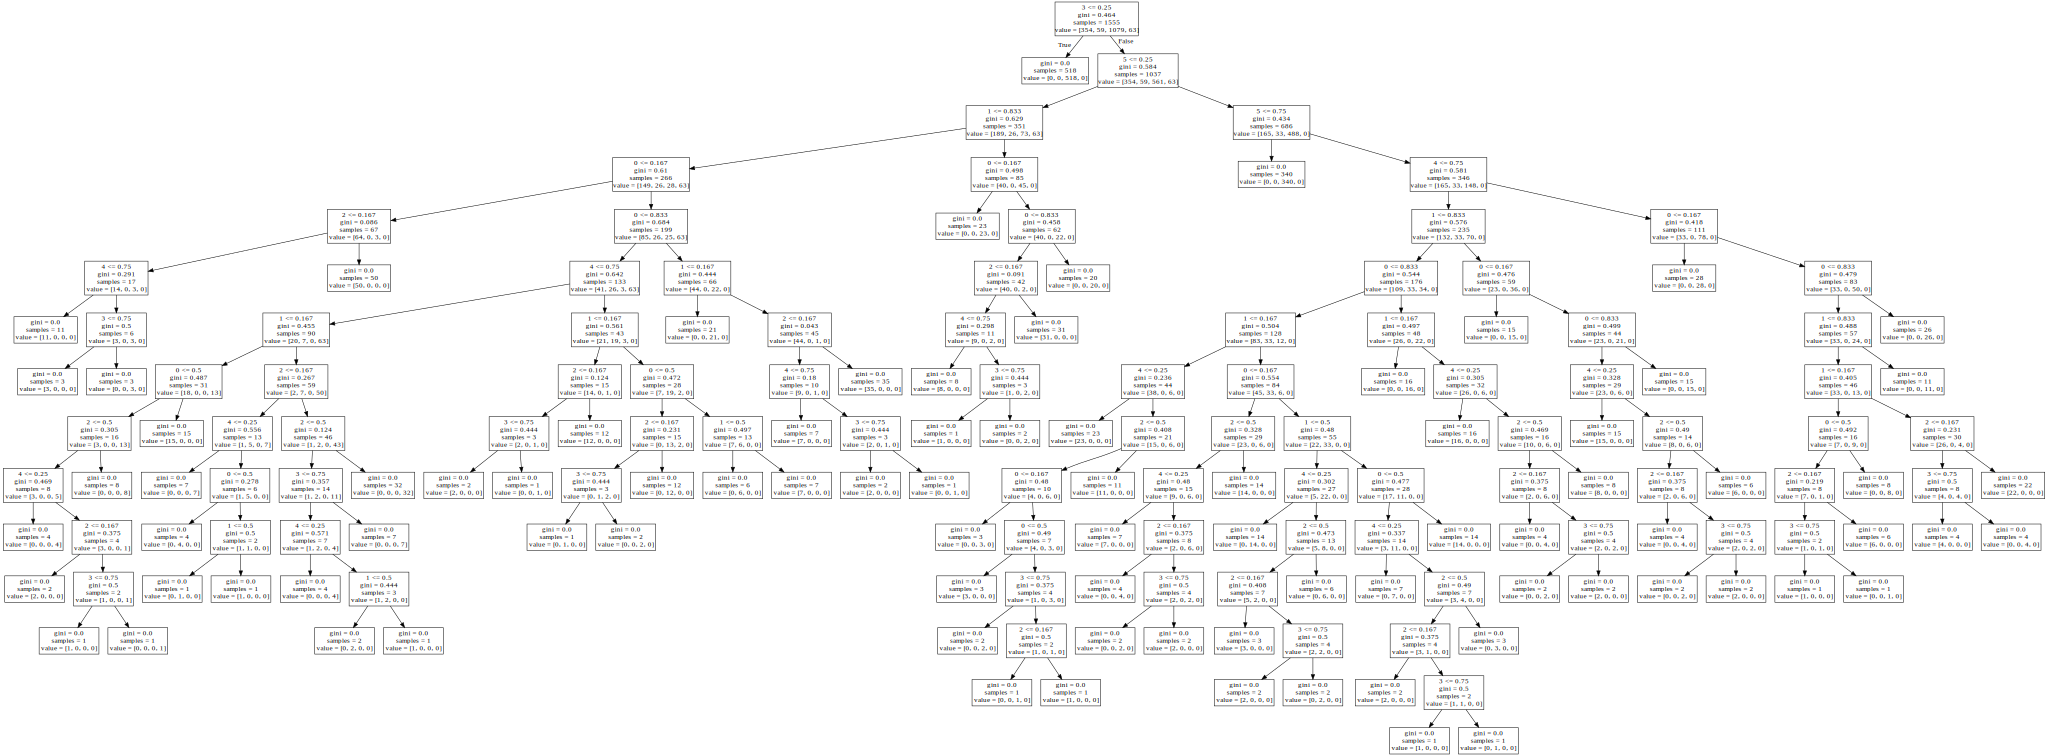

In [44]:
test_all_trees(X_n, y)

# 6

In [45]:
data = pd.read_csv('assets/bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [46]:
X, y = prepare_data(data, target_col=16)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3


[[38232  1690]
 [ 2941  2348]]
gini tree 0.8975692285086424
[[38947   975]
 [ 3465  1824]]
random forest 0.9017936493914439
[[39581   341]
 [ 4406   883]]
extremely random 0.8950032532832921


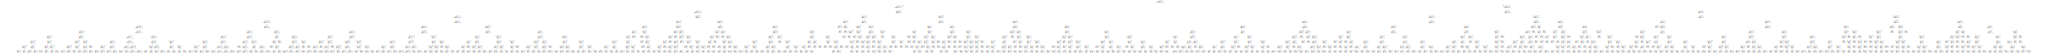

In [47]:
test_all_trees(X, y, max_depth=10)

In [48]:
X_n = normalize(X)
X_n.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.526316,0.363636,0.5,0.666667,0.0,0.423608,1.0,0.0,1.0,0.133333,0.727273,0.166031,0.0,0.0,0.0,1.0
1,0.342105,0.818182,1.0,0.333333,0.0,0.131854,1.0,0.0,1.0,0.133333,0.727273,0.096056,0.0,0.0,0.0,1.0
2,0.197368,0.181818,0.5,0.333333,0.0,0.128087,1.0,1.0,1.0,0.133333,0.727273,0.048346,0.0,0.0,0.0,1.0
3,0.381579,0.090909,0.5,1.000000,0.0,0.337659,1.0,0.0,1.0,0.133333,0.727273,0.058524,0.0,0.0,0.0,1.0
4,0.197368,1.000000,1.0,1.000000,0.0,0.127948,0.0,0.0,1.0,0.133333,0.727273,0.125954,0.0,0.0,0.0,1.0


In [49]:
test_all_trees(X_n, y, graph=False)

[[36911  3011]
 [ 2732  2557]]
gini tree 0.8729733062505203
[[38723  1199]
 [ 3357  1932]]
random forest 0.8992280312397372
[[38847  1075]
 [ 3596  1693]]
extremely random 0.8966844440426958
